In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import sys
sys.path.append('home/mayalaidler/mypthon/lib/python3.9/site-packages')
import glob
import capnp
import seaborn as sns

# $RAW_VOLTAGE_DIR = '/mnt/blpn0/scratch/data/K2-18b-raw/20231001T110319Z-20230930-0005/Unknown/GUPPI'

# recipe = '/datag0/bfr5_archive/MeerKAT-array_1-20231001T110319Z.bfr5'

# output = 'scratch/users/mayalaidler/seticore.output'

# seticore --input "/scratch/data/K2-18b-raw/20231001T110319Z-20230930-0005/Unknown/GUPPI" --recipe '/datag0/bfr5_archive/MeerKAT-array_1-20231001T110319Z.bfr5' --output 'scratch/users/mayalaidler/seticore.output' --snr 10

#for file in /scratch/data/K2-18b-raw/20231001T110319Z-20230930-0005/Unknown/GUPPI*; do
#    seticore -i "$file" -output "${file%.ext}.hits" --snr 10 --recipe '/datag0/bfr5_archive/MeerKAT-array_1-20231001T110319Z.bfr5'
#done

In [3]:
import socket
print(socket.gethostname())

blpn129


In [4]:
#Make the pandas dataframe
hit_capnp = capnp.load('/home/mayalaidler/seticore/hit.capnp')

# Define a function to read the .hits file
def read_hits(filename):
    with open(filename, 'rb') as f:
        hits = hit_capnp.Hit.read_multiple(f)
        data = [hit.to_dict()['filterbank'] for hit in hits]
        f.seek(0,0)
        hits = hit_capnp.Hit.read_multiple(f)
        data2 = [hit.to_dict()['signal'] for hit in hits]
        d = pd.DataFrame(data)
        d2 = pd.DataFrame(data2)
        d3 = pd.concat([d, d2], axis = 1, join = 'outer')
    return d3

In [5]:
directory = '/scratch/data/K2-18b-raw/20231001T110319Z-20230930-0005/Unknown/GUPPI'

# hitsfileD = '/scratch/data/20230930T111311Z-20230930-0007/seticore_search/guppi_60217_40391_002085_K2-18_0001.hits'
# read_hits(hitsfileD)

# allHits = ['/mnt/blpn*/scratch/data/20230930T111311Z-20230930-0007/seticore_search/guppi_60217_40391_002085_K2-18_0001.hits']

allHits2 = ['/mnt/blpn{}/scratch/data/20230930T111311Z-20230930-0007/seticore_search'.format(i) for i in range(64)]

dataframes = []

# print(os.path.dir('/mnt/blpn*/scratch/data/20230930T111311Z-20230930-0007/seticore_search/guppi_60217_40391_002085_K2-18_0001.hits'))

for directory in allHits2:
    # List all files in the directory
    if os.path.exists(directory):
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            # Check if the file ends with '.hits'
            if file_path.endswith('.hits'):
                # Ensure that we're processing files and not directories
                if os.path.isfile(file_path):
                    try:
                        data = read_hits(file_path)  # Replace with your actual function to read .hits files
                        dataframes.append(data)
                    except Exception as e:
                        print(f"Error reading file {file_path}: {e}")
    else:
        print(f"Directory does not exist: {directory}")

# Concatenate all DataFrames if any were found
mergedpd = pd.concat(dataframes, ignore_index=True)
print(mergedpd)

Directory does not exist: /mnt/blpn4/scratch/data/20230930T111311Z-20230930-0007/seticore_search
Directory does not exist: /mnt/blpn14/scratch/data/20230930T111311Z-20230930-0007/seticore_search


Directory does not exist: /mnt/blpn19/scratch/data/20230930T111311Z-20230930-0007/seticore_search
Directory does not exist: /mnt/blpn28/scratch/data/20230930T111311Z-20230930-0007/seticore_search
Directory does not exist: /mnt/blpn35/scratch/data/20230930T111311Z-20230930-0007/seticore_search
Directory does not exist: /mnt/blpn61/scratch/data/20230930T111311Z-20230930-0007/seticore_search
                sourceName         fch1      foff       tstart    tsamp  \
0                    K2-18   543.969104  0.000001  60217.46749  7.89516   
1                    K2-18   543.999959  0.000001  60217.46749  7.89516   
2                    K2-18   544.030800  0.000001  60217.46749  7.89516   
3                    K2-18   544.079669  0.000001  60217.46749  7.89516   
4      3910661735547769344   543.969104  0.000001  60217.46749  7.89516   
...                    ...          ...       ...          ...      ...   
58544  3910698599251608320  1087.853959  0.000001  60217.46749  7.89516   
58545  3

In [6]:
# Run seticore on the incoherent sum. 

## Freq vs Beam #

(58549,)
(58549,)


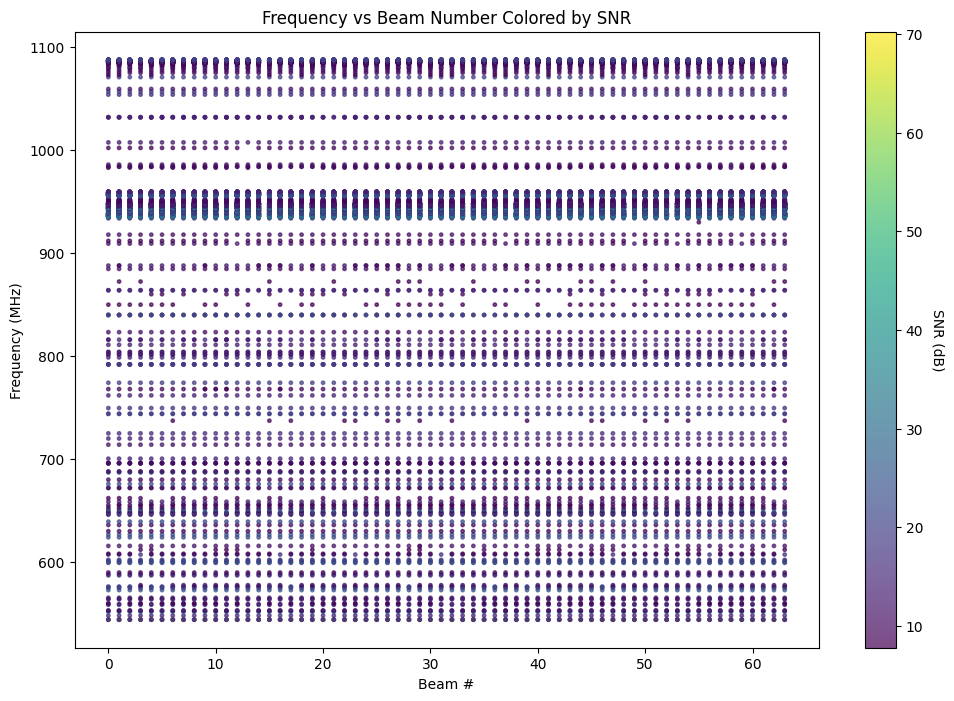

In [7]:
plt.figure(figsize=(12, 8))


# Create the scatter plot

print(mergedpd['frequency'].shape)
# first_beam = beam.iloc[:, 0]  
print(mergedpd['snr'].shape)

scatter = plt.scatter(mergedpd['beam'].iloc[:,0], mergedpd['frequency'], c=10 * np.log10(mergedpd['snr']), cmap='viridis', s=6, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('SNR (dB)', rotation=270, labelpad=15)

plt.ylabel('Frequency (MHz)')
plt.xlabel('Beam #')

# Title
plt.title('Frequency vs Beam Number Colored by SNR')

# Show the plot
plt.show()

(58549,)
(58549,)
0        False
1         True
2        False
3         True
4        False
         ...  
58544     True
58545     True
58546     True
58547     True
58548     True
Name: snr, Length: 58549, dtype: bool


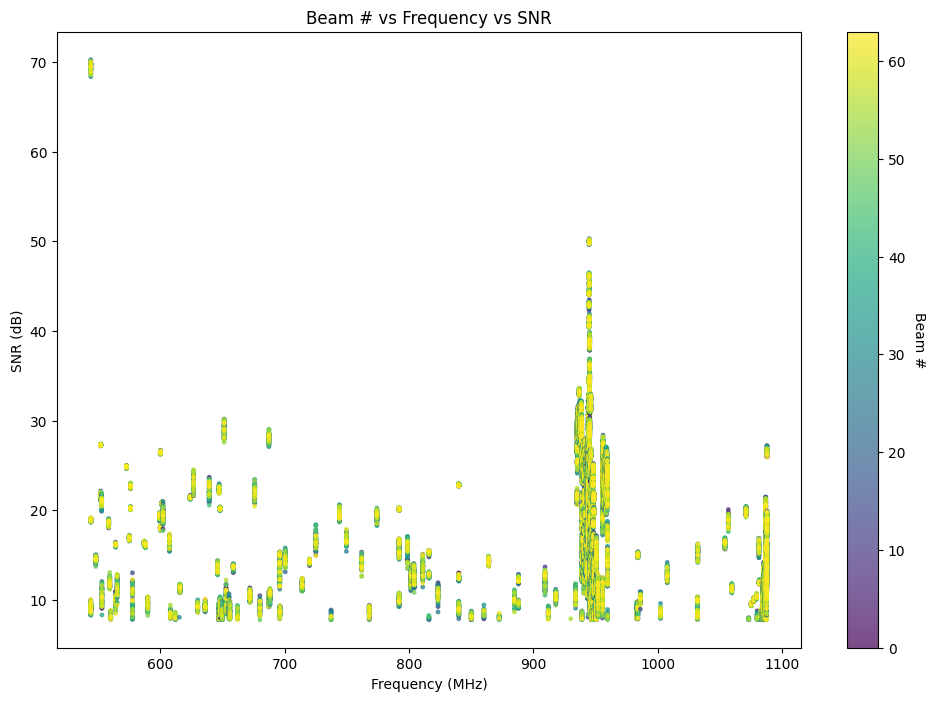

In [8]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
print(mergedpd['frequency'].shape)
# first_beam = beam.iloc[:, 0]  
print(mergedpd['snr'].shape)
print(mergedpd['snr']> 20)

scatter = plt.scatter(mergedpd['frequency'], 10 * np.log10(mergedpd['snr']), c=mergedpd['beam'].iloc[:,0], cmap='viridis', s=6, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Beam #', rotation=270, labelpad=15)

plt.xlabel('Frequency (MHz)')
plt.ylabel('SNR (dB)')

# Title
plt.title('Beam # vs Frequency vs SNR')

# Show the plot
plt.show()

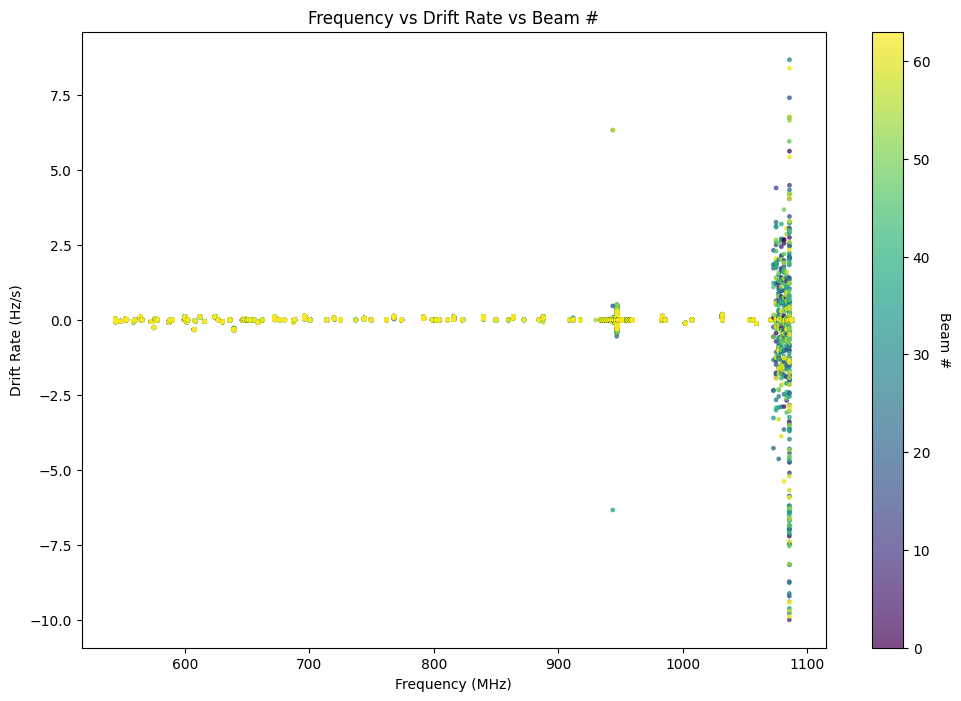

In [9]:
# freq and drift rate plot, freq all kinds of drift rates are satelittes
#GPS frequesncy 

#pull up the filterbank file for some of them

#Multibeam analysis -> JWST show up in other beams. How often do we get the same hits in multiple beams. What about othe rnormal observations. FReq drift rate in diff beams. ratio of them.
#ran on BLISS, crashed bc the power levels go to infinite

#compare BLISS and Seticore

plt.figure(figsize=(12, 8))

driftRate = mergedpd['driftRate']

scatter = plt.scatter(mergedpd['frequency'], driftRate, c=mergedpd['beam'].iloc[:,0], cmap='viridis', s=6, alpha=0.7)
# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Beam #', rotation=270, labelpad=15)

plt.xlabel('Frequency (MHz)')
plt.ylabel('Drift Rate (Hz/s)')


# Title
plt.title('Frequency vs Drift Rate vs Beam #')
# Show the plot
plt.show()


# Same Drift Rate and Freq in Multiple Beams (possibly RFI)

56187 58549
Number of hits in multiple beams: 56187
Total number of hits: 58549


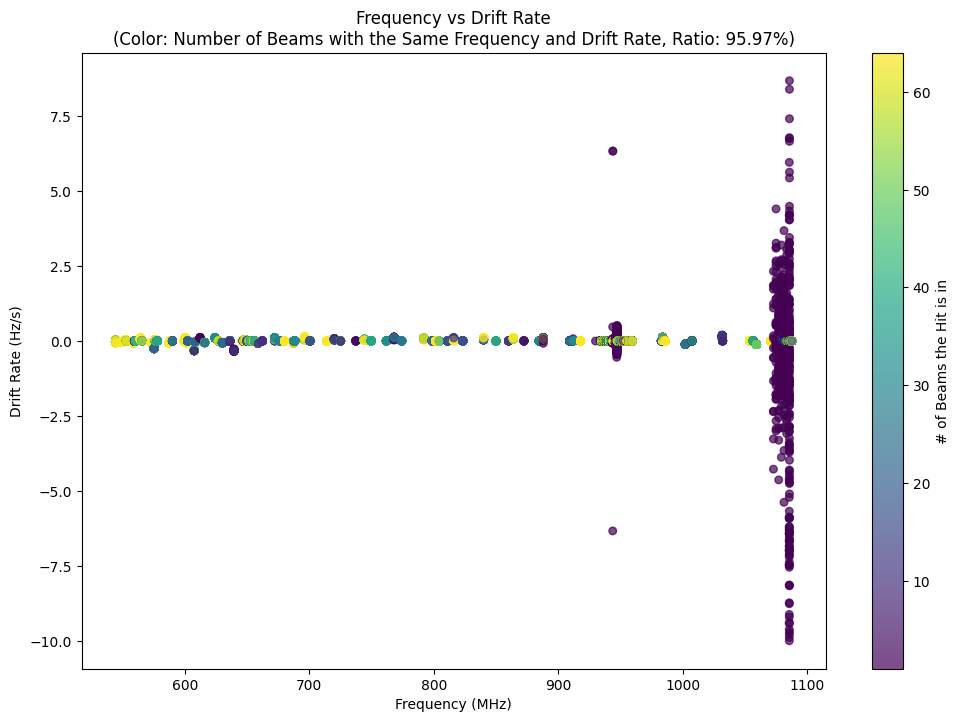

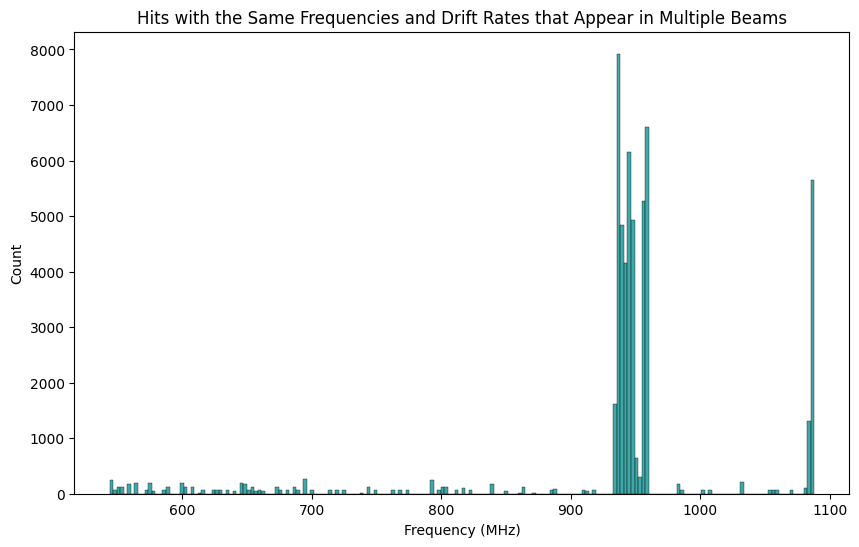

0.9596577225913338

In [10]:
def visualize_drift_rates(df, freq_tolerance=1e-8, drift_tolerance=1e-8):
    df = df.loc[:, ~df.columns.duplicated()]
    df = df[['frequency', 'beam', 'driftRate']].copy()
    df['freq_group'] = df['frequency'].round(-int(np.log10(freq_tolerance)))
    df['drift_group'] = df['driftRate'].round(-int(np.log10(drift_tolerance)))

    # Identify hits that appear in multiple beams at the same frequency and drift rate
    grouped = df.groupby(['freq_group', 'drift_group'])
    df['multiple_drift_rates'] = grouped['beam'].transform(lambda x: x.nunique() > 1)

    # Filter the DataFrame to only include hits that meet the criteria
    df_filtered = df[df['multiple_drift_rates']]

    # Calculate the ratio of such hits
    ratio = len(df_filtered) / len(df)
    
    # Count the number of unique beams each hit is in
    df['beam_count'] = grouped['beam'].transform('nunique')

    print(len(df_filtered), len(df))
    print(f"Number of hits in multiple beams: {len(df_filtered)}")
    print(f"Total number of hits: {len(df)}")

    # Plot 1: Scatter Plot of Frequency vs Drift Rate, colored by beam_count
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['frequency'], df['driftRate'], c=df['beam_count'], cmap='viridis', s=30, alpha=0.7)
    plt.colorbar(scatter, label='# of Beams the Hit is in')
    plt.title(f'Frequency vs Drift Rate\n(Color: Number of Beams with the Same Frequency and Drift Rate, Ratio: {ratio:.2%})')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Drift Rate (Hz/s)')
    plt.show()

    # Plot 2: Histogram of Frequencies with Multiple Drift Rates
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['multiple_drift_rates']]['frequency'], bins=200, color='darkcyan')
    plt.title('Hits with the Same Frequencies and Drift Rates that Appear in Multiple Beams')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Count')
    plt.show()
    
    #SNR 

    return ratio

visualize_drift_rates(mergedpd)


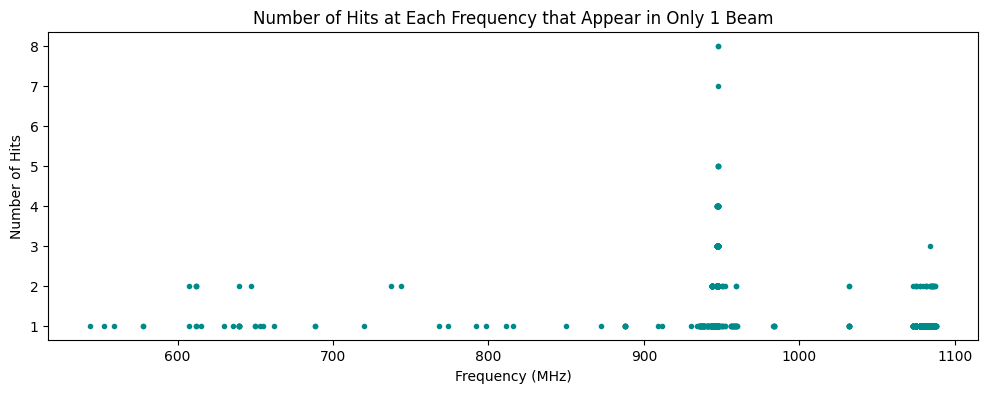

In [11]:
def plot_single_beam_hits(df, freq_tolerance=1e-8, drift_tolerance=1e-8):
    df = df.loc[:, ~df.columns.duplicated()]

    # Select and copy relevant columns
    df = df[['frequency', 'beam', 'driftRate']].copy()

    # Group by rounded frequency and drift rate within the tolerance
    df['freq_group'] = df['frequency'].round(-int(np.log10(freq_tolerance)))
    df['drift_group'] = df['driftRate'].round(-int(np.log10(drift_tolerance)))

    # Identify hits that appear in multiple beams at the same frequency and drift rate
    grouped = df.groupby(['freq_group', 'drift_group'])

    # Count the number of unique beams each hit is in
    df['beam_count'] = grouped['beam'].transform('nunique')

    # Filter the DataFrame to include only hits that appear in a single beam
    df_single_beam = df[df['beam_count'] == 1]

    # Count the number of hits at each frequency that appear in only one beam
    single_beam_counts = df_single_beam['frequency'].value_counts().sort_index()

    # Plot: Number of Hits at Each Frequency that Appear in Only 1 Beam
    plt.figure(figsize=(12, 4))
    plt.scatter(single_beam_counts.index, single_beam_counts.values, s = 9, color='darkcyan')
    plt.title('Number of Hits at Each Frequency that Appear in Only 1 Beam')
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Number of Hits')
    plt.show()

plot_single_beam_hits(mergedpd)


In [12]:
def find_hit_by_frequency_and_driftrate(df, target_frequency, target_drift_rate, freq_tolerance, drift_tolerance):
    filtered_df = df[
        (df['frequency'].between(target_frequency - freq_tolerance, target_frequency + freq_tolerance)) &
        (df['driftRate'].between(target_drift_rate - drift_tolerance, target_drift_rate + drift_tolerance))
    ]

    if filtered_df.empty:
        print("No hits found with the specified frequency and drift rate.")
        return None
    else:
        print("Found hit(s) at index(es):")
        return filtered_df.index.tolist()

def find_hit_by_frequency_and_snr(df, target_frequency, target_snr, freq_tolerance, snr_tolerance):
    filtered_df = df[
        (df['frequency'].between(target_frequency - freq_tolerance, target_frequency + freq_tolerance)) &
        (df['snr'].between(target_snr - snr_tolerance, target_snr + snr_tolerance))
    ]

    if filtered_df.empty:
        print("No hits found with the specified frequency and drift rate.")
        return None
    else:
        print("Found hit(s) at index(es):")
        return filtered_df.index.tolist()


# Example usage
target_frequency = 950  # Replace with your target frequency in MHz
target_drift_rate = 7  # Replace with your target drift rate in Hz/s

indices = find_hit_by_frequency_and_driftrate(mergedpd, target_frequency, target_drift_rate, freq_tolerance=50, drift_tolerance=1)
negSix = find_hit_by_frequency_and_driftrate(mergedpd, 950, -6, 50, 1)
highSNR = find_hit_by_frequency_and_snr(mergedpd, 520, 70, 100, 10)
lowSNR = find_hit_by_frequency_and_snr(mergedpd, 600, 5, 100, 2)

print(indices)
print(negSix)

Found hit(s) at index(es):
Found hit(s) at index(es):
Found hit(s) at index(es):
Found hit(s) at index(es):
[25726, 26449]
[24560]


In [13]:
print(highSNR)
print(lowSNR)

[3, 7, 11, 19, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87, 91, 95, 99, 103, 107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 155, 159, 163, 167, 171, 179, 183, 187, 191, 195, 199, 203, 211, 215, 219, 223, 231, 235, 239, 251, 255, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 1451, 1473, 1503, 1505, 1507, 1509, 1511, 1513, 1515, 1517, 1519, 1521, 1523, 1525, 1527, 1529, 1531, 1533, 1535, 1537, 1539, 1541, 1543, 1545, 1547, 1549, 1551, 1553, 1555, 1557, 1559, 1563, 1565, 1567, 1569, 1571, 1573, 1575, 1577, 1579, 1581, 1583, 1585, 1587, 1589, 1591, 1593, 1595, 1597, 1599, 1601, 1603, 1605, 1607, 1609, 1613, 1615, 1617, 1619, 1621, 1623, 1625, 1627, 1629, 1696, 1698, 1700, 1707, 1708, 1712, 1713, 1722, 17

In [14]:
#Check the indices to make sure they are right
mergedpd.iloc[indices]

,sourceName,fch1,foff,tstart,tsamp,ra,dec,telescopeId,numTimesteps,numChannels,...,frequency,index,driftSteps,driftRate,snr,coarseChannel,beam,numTimesteps,power,incoherentPower
25726,3910601983962827136,943.965343,0.000001,60217.46749,7.89516,11.506933,7.43721,64,36,3186,...,943.965384,533,3107,6.329491,37.883690,4,31,36,5.771678e+16,0.0
26449,3910799380659933952,943.965343,0.000001,60217.46749,7.89516,11.520600,8.08041,64,36,3186,...,943.965384,533,3107,6.329491,41.071896,4,58,36,5.679292e+16,0.0


# Plot indices around ~950 to determine what they are

sourceName                                       3910744611236991616
fch1                                                      909.315456
foff                                                        0.000001
tstart                                                   60217.46749
tsamp                                                        7.89516
ra                                                         11.507867
dec                                                          7.57336
telescopeId                                                       64
numTimesteps                                                      36
numChannels                                                       84
data               [182528493223936.0, 208499439042560.0, 2528781...
coarseChannel                                                     63
startChannel                                                   14482
beam                                                              23
frequency                         

/tmp/ipykernel_7110/728499923.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


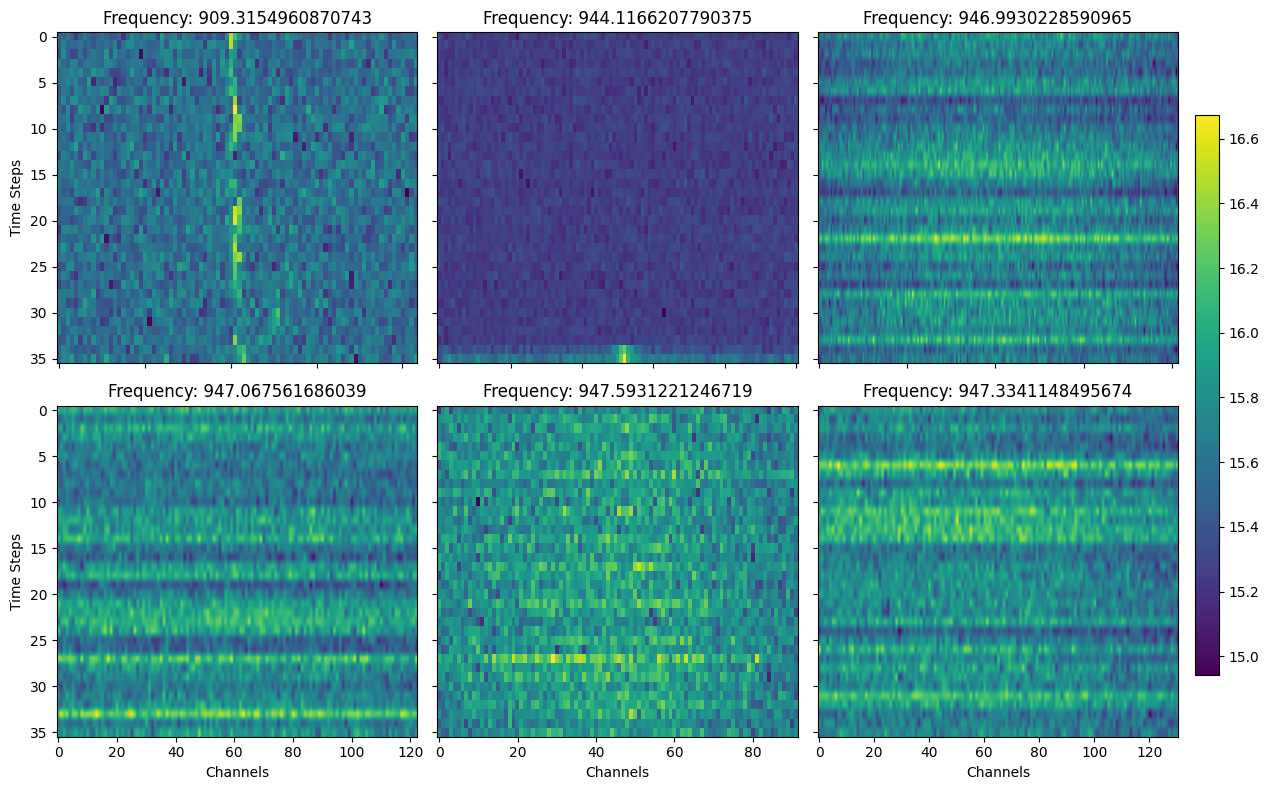

In [15]:
filtered_df = mergedpd[(mergedpd['frequency'] >= 900) & (mergedpd['frequency'] <= 950) & (mergedpd['driftRate'] >= 0.01)]
if len(filtered_df) > 6:
    step = len(filtered_df) // 6
    indices = list(range(0, len(filtered_df), step))[:6]
    selected_df = filtered_df.iloc[indices]
else:
    selected_df = filtered_df

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for idx, (i, row) in enumerate(selected_df.iterrows()):
    data = np.array(row['data'])
    
    # Extract single scalar values
    num_time_steps = int(row['numTimesteps'].values[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
    num_channels = int(row['numChannels'].values[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])
    
    # Reshape the data
    reshaped_data = data.reshape(num_time_steps, num_channels)
    
    # Plot
    im = axs[idx].imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
    axs[idx].set_title(f"Frequency: {row['frequency']}")
    axs[idx].set_xlabel('Channels')
    axs[idx].set_ylabel('Time Steps') 
    axs[idx].label_outer() # Hide labels on inner plots
    print(row)

# Add a colorbar to the right of all plots
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Intensity')

plt.tight_layout()
plt.show()



numChannels


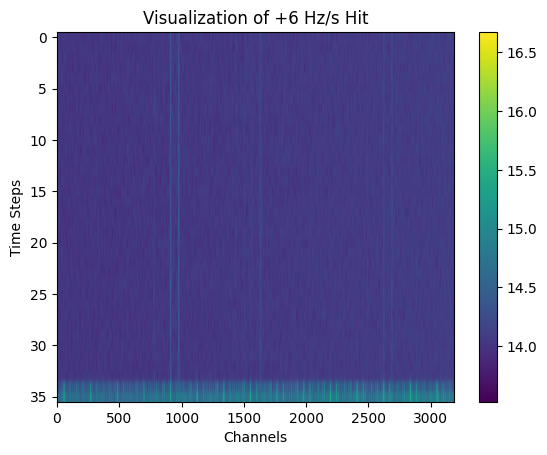

sourceName                                       3910799380659933952
fch1                                                      943.965343
foff                                                        0.000001
tstart                                                   60217.46749
tsamp                                                        7.89516
ra                                                           11.5206
dec                                                          8.08041
telescopeId                                                       64
numTimesteps                                                      36
numChannels                                                     3186
data               [86986358521856.0, 119478977298432.0, 95909253...
coarseChannel                                                      4
startChannel                                                     493
beam                                                              58
frequency                         

In [16]:
# Accessing the specific row for index 25661
row = mergedpd.loc[26449]

data = np.array(row['data'])
# If row is a Series with single values, use .iloc[0] to extract scalar
num_time_steps = int(row['numTimesteps'].iloc[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
num_channels = int(row['numChannels'].iloc[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])

print('numChannels')

# Reshape the data
reshaped_data = data.reshape(num_time_steps, num_channels)

# Visualize using plt.imshow
plt.imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Visualization of +6 Hz/s Hit')
plt.xlabel('Channels')
plt.ylabel('Time Steps')
plt.show()
# plt.imshow(mergedpd.loc[25661]['data'].reshape(mergedpd.loc[25661]['numTimeSteps'], mergedpd.loc[25661]['numChannels']))
print(mergedpd.loc[26449])

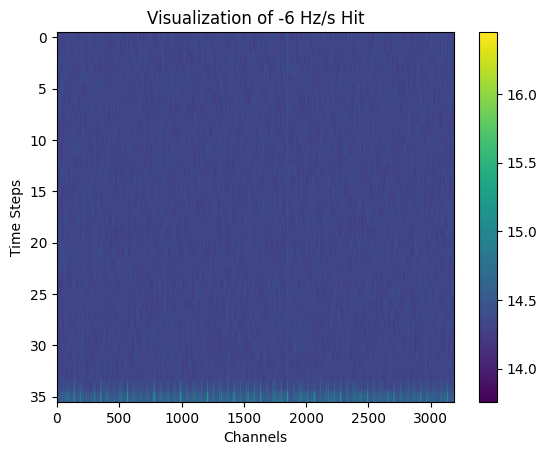

sourceName                                       3913678726735203200
fch1                                                      943.882927
foff                                                        0.000001
tstart                                                   60217.46749
tsamp                                                        7.89516
ra                                                         11.471467
dec                                                          7.80225
telescopeId                                                       64
numTimesteps                                                      36
numChannels                                                     3185
data               [157264656728064.0, 211428371857408.0, 1351176...
coarseChannel                                                      3
startChannel                                                   50229
beam                                                              38
frequency                         

In [29]:

# Accessing the specific row for index 25661
row = mergedpd.loc[negSix[0]]

data = np.array(row['data'])
# If row is a Series with single values, use .iloc[0] to extract scalar
num_time_steps = int(row['numTimesteps'].iloc[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
num_channels = int(row['numChannels'].iloc[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])


# Reshape the data
reshaped_data = data.reshape(num_time_steps, num_channels)

# Visualize using plt.imshow
plt.imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Visualization of -6 Hz/s Hit')
plt.xlabel('Channels')
plt.ylabel('Time Steps')
plt.show()
# plt.imshow(mergedpd.loc[25661]['data'].reshape(mergedpd.loc[25661]['numTimeSteps'], mergedpd.loc[25661]['numChannels']))
print(row)

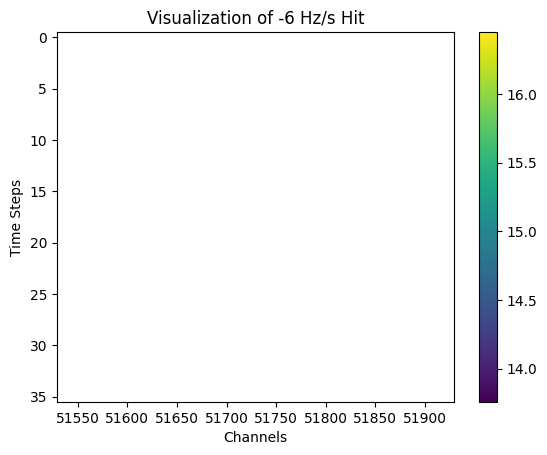

sourceName                                       3913678726735203200
fch1                                                      943.882927
foff                                                        0.000001
tstart                                                   60217.46749
tsamp                                                        7.89516
ra                                                         11.471467
dec                                                          7.80225
telescopeId                                                       64
numTimesteps                                                      36
numChannels                                                     3185
data               [157264656728064.0, 211428371857408.0, 1351176...
coarseChannel                                                      3
startChannel                                                   50229
beam                                                              38
frequency                         

In [18]:
# Accessing the specific row for index 25661
row = mergedpd.loc[24560]

data = np.array(row['data'])
# If row is a Series with single values, use .iloc[0] to extract scalar
num_time_steps = int(row['numTimesteps'].iloc[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
num_channels = int(row['numChannels'].iloc[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])
startChannel = row['startChannel']


# Reshape the data
reshaped_data = data.reshape(num_time_steps, num_channels)

# Visualize using plt.imshow
plt.imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Visualization of -6 Hz/s Hit')
plt.xlabel('Channels')
plt.xlim((startChannel + 3000/2) - 200,(startChannel + 3000/2) + 200)
plt.ylabel('Time Steps')
plt.show()



print(row)

# High SNR hits

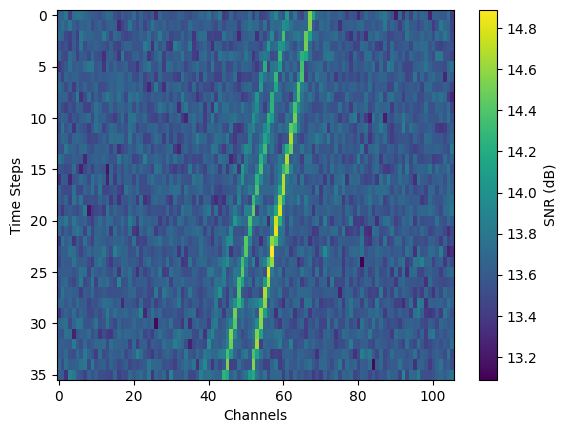

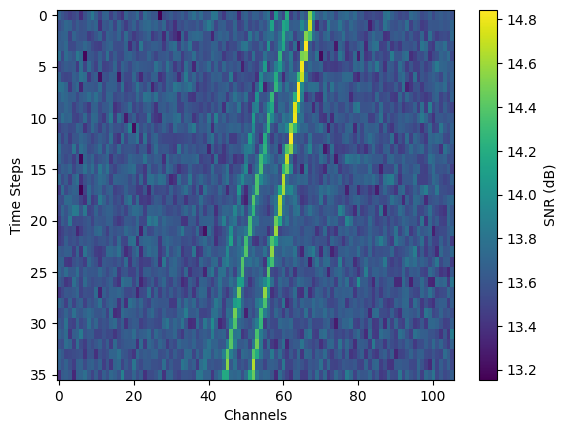

In [26]:
for idx in highSNR[:2]:
    row = mergedpd.loc[idx]
    data = np.array(row['data'])
    num_time_steps = int(row['numTimesteps'].iloc[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
    num_channels = int(row['numChannels'].iloc[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])

    # Reshape the data
    reshaped_data = data.reshape(num_time_steps, num_channels)

    # Visualize using plt.imshow
    plt.imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
    plt.colorbar(label = 'SNR (dB)')
    plt.title('')
    plt.xlabel('Channels')
    plt.ylabel('Time Steps')
    plt.show()
    

# Making an HDf5 file from the hit of the highSNR value


In [20]:
# import h5py

# def convert_hits_to_h5(hits_file, output_file):
#     # Load the hits file into a DataFrame
#     df = read_hits(hits_file)

#     # Create an HDF5 file
#     with h5py.File(output_file, 'w') as h5f:
#         # Create a group for the data
#         grp = h5f.create_group('data')
        
#         # Create datasets for each required attribute
#         grp.create_dataset('fch1', data=df['fch1'].values)
#         grp.create_dataset('foff', data=df['foff'].values)
#         grp.create_dataset('nfpc', data=df['numChannels'].values)  # Assuming 'numChannels' corresponds to nfpc
#         grp.create_dataset('source_name', data=df['source_name'].astype('S'))  # Store strings as bytes
#         grp.create_dataset('src_dej', data=df['src_dej'].values)
#         grp.create_dataset('src_raj', data=df['src_raj'].values)
#         grp.create_dataset('telescope_id', data=df['telescope_id'].values)
#         grp.create_dataset('tsamp', data=df['tsamp'].values)
#         grp.create_dataset('tstart', data=df['tstart'].values)

#     print(f"Conversion complete. HDF5 file saved as {output_file}")


# Look at the ghost hits

In [21]:
# for idx in lowSNR[:5]:
#     row = mergedpd.loc[idx]
#     data = np.array(row['data'])
#     num_time_steps = int(row['numTimesteps'].iloc[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
#     num_channels = int(row['numChannels'].iloc[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])

#     # Reshape the data
#     reshaped_data = data.reshape(num_time_steps, num_channels)

#     print(row['snr'])

#     # Visualize using plt.imshow
#     plt.imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
#     plt.colorbar()
#     plt.title('Visualization')
#     plt.xlabel('Channels')
#     plt.ylabel('Time Steps')
#     plt.show()

# Take out everything between 870-950 MHz

In [22]:
filtered_table = mergedpd[(mergedpd['frequency'] < 870) | (mergedpd['frequency'] > 950)]

# Display the filtered table
print((filtered_table['snr'] == 0).sum())

0


## Take out everything that has the same hit in multiple beams

In [23]:
filtered_table = filtered_table.loc[:, ~filtered_table.columns.duplicated()]

frequency_drift_counts = filtered_table.groupby(['frequency', 'driftRate']).size().reset_index(name='count')

# Group by frequency and drift rate and count occurrences in each beam
beam_counts = filtered_table.groupby(['frequency', 'driftRate', 'beam']).size().reset_index(name='count')

# Group by frequency and drift rate to find out how many distinct beams each combination appears in
distinct_beam_counts = beam_counts.groupby(['frequency', 'driftRate']).size().reset_index(name='beam_count')

# Filter to keep only those combinations that are present in exactly one beam
single_beam_hits = distinct_beam_counts[distinct_beam_counts['beam_count'] == 1]

# Merge back to get the original rows
filtered_dfnew = filtered_table.merge(single_beam_hits[['frequency', 'driftRate']], on=['frequency', 'driftRate'])

print(filtered_df)

                sourceName        fch1      foff       tstart    tsamp  \
5756   3910744611236991616  909.315456  0.000001  60217.46749  7.89516   
5790   3910572262789124864  909.315456  0.000001  60217.46749  7.89516   
5797                 K2-18  911.989473  0.000001  60217.46749  7.89516   
5798   3910661735547769344  911.989474  0.000001  60217.46749  7.89516   
5799   3910747531814692736  911.989474  0.000001  60217.46749  7.89516   
...                    ...         ...       ...          ...      ...   
33464  3910698599251608320  947.432845  0.000001  60217.46749  7.89516   
33468  3910698599251608320  947.567065  0.000001  60217.46749  7.89516   
33469  3910698599251608320  947.593072  0.000001  60217.46749  7.89516   
33471  3910698599251608320  947.631207  0.000001  60217.46749  7.89516   
33472  3910698599251608320  947.657224  0.000001  60217.46749  7.89516   

              ra       dec  telescopeId  numTimesteps  numChannels  ...  \
5756   11.507867  7.573360          

(1020,)
(1020,)


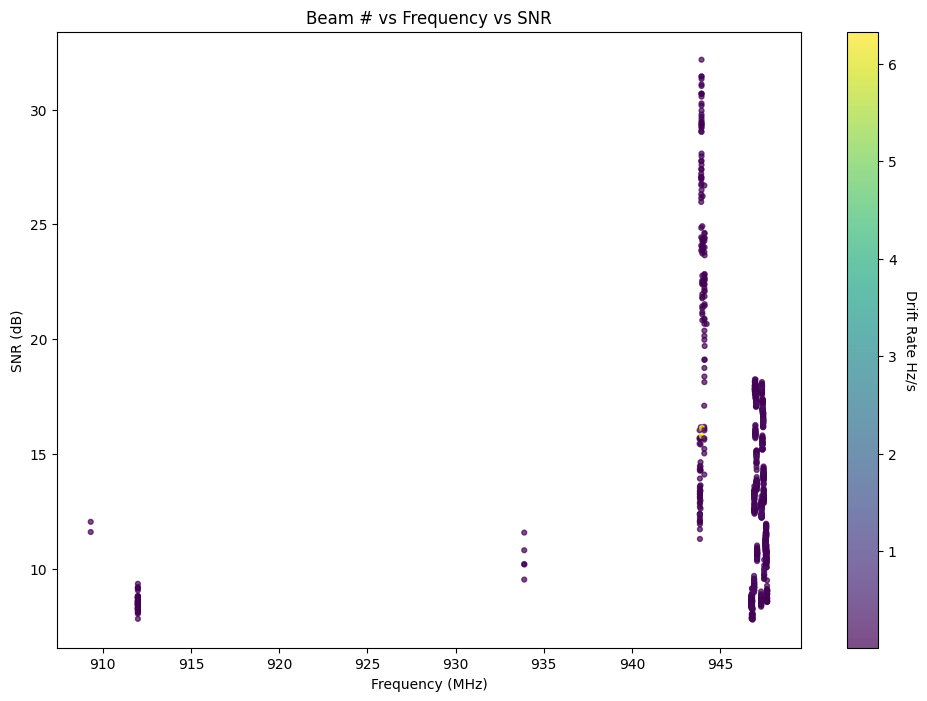

In [32]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
print(filtered_df['frequency'].shape)
# first_beam = beam.iloc[:, 0]  
print(filtered_df['snr'].shape)

scatter = plt.scatter(filtered_df['frequency'], 10 * np.log10(filtered_df['snr']), c=filtered_df['driftRate'], cmap='viridis', s=12, alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Drift Rate Hz/s', rotation=270, labelpad=15)

plt.xlabel('Frequency (MHz)')
plt.ylabel('SNR (dB)')
plt.title('Beam # vs Frequency vs SNR')
plt.show()

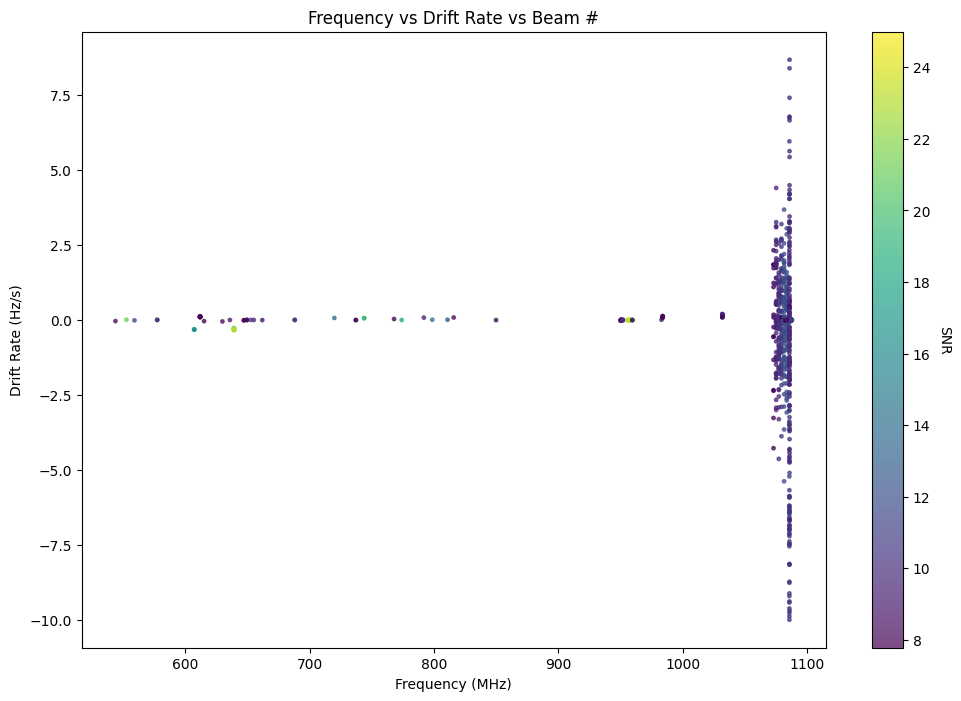

In [ ]:
plt.figure(figsize=(12, 8))

driftRate = filtered_df['driftRate']

scatter = plt.scatter(filtered_df['frequency'], driftRate, c=10*np.log10(filtered_df['snr']), cmap='viridis', s=6, alpha=0.7)
# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('SNR', rotation=270, labelpad=15)

plt.xlabel('Frequency (MHz)')
plt.ylabel('Drift Rate (Hz/s)')
plt.title('Frequency vs Drift Rate vs Beam #')
plt.show()

sourceName                                       3910378920541529984
fch1                                                      543.969103
foff                                                        0.000001
tstart                                                   60217.46749
tsamp                                                        7.89516
ra                                                         11.517333
dec                                                          6.89848
telescopeId                                                       64
numTimesteps                                                      36
numChannels                                                       96
data               [29234378571776.0, 55583491227648.0, 357959854...
coarseChannel                                                      0
startChannel                                                   35044
beam                                                              20
frequency                         

/tmp/ipykernel_7110/4014745769.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


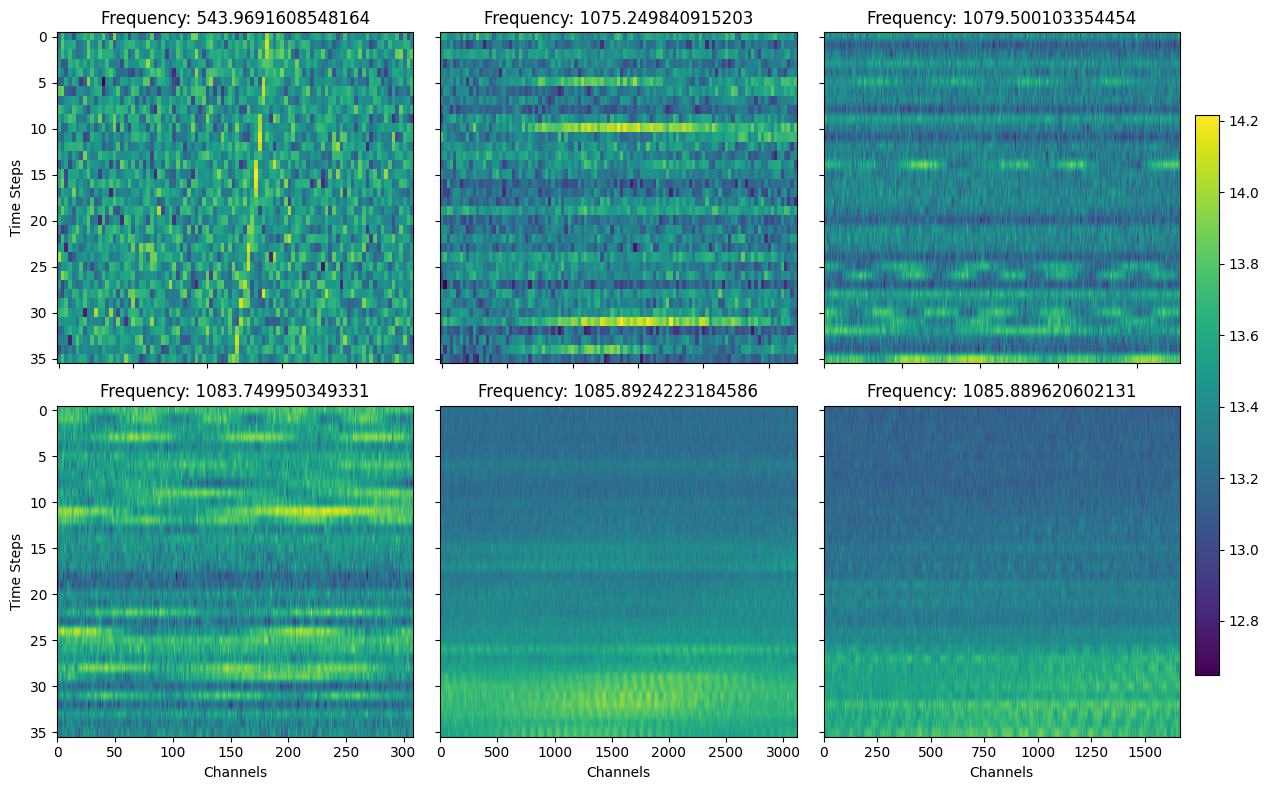

In [34]:
if len(filtered_dfnew) > 6:
    step = len(filtered_dfnew) // 6
    indices = list(range(0, len(filtered_dfnew), step))[:6]
    selected_df = filtered_dfnew.iloc[indices]
else:
    selected_df = filtered_dfnew

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for idx, (i, row) in enumerate(selected_df.iterrows()):
    data = np.array(row['data'])
    
    # Extract single scalar values
    num_time_steps = int(row['numTimesteps'].values[0] if isinstance(row['numTimesteps'], pd.Series) else row['numTimesteps'])
    num_channels = int(row['numChannels'].values[0] if isinstance(row['numChannels'], pd.Series) else row['numChannels'])
    
    # Reshape the data
    reshaped_data = data.reshape(num_time_steps, num_channels)
    
    # Plot
    im = axs[idx].imshow(np.log10(reshaped_data), aspect='auto', cmap='viridis')
    axs[idx].set_title(f"Frequency: {row['frequency']}")
    axs[idx].set_xlabel('Channels')
    axs[idx].set_ylabel('Time Steps') 
    axs[idx].label_outer() # Hide labels on inner plots
    print(row)

# Add a colorbar to the right of all plots
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Intensity')

plt.tight_layout()
plt.show()